In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
from sklearn import datasets

In [4]:
iris=datasets.load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
data=pd.DataFrame(iris.data[:,2:],columns=iris.feature_names[2:])

In [9]:
data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

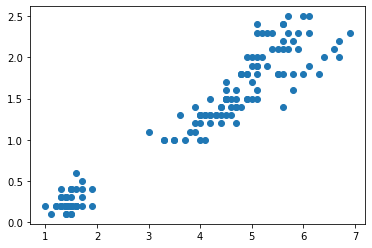

In [12]:
plt.scatter(data['petal length (cm)'],data['petal width (cm)'])

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
x=np.array(data['petal length (cm)']).reshape(-1,1)

y=np.array(data['petal width (cm)']).reshape(-1,1)

In [16]:
data['petal length (cm)']=scaler.fit_transform(x)
data['petal width (cm)']=scaler.fit_transform(y)


In [38]:
data.head()


,petal length (cm),petal width (cm),category
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [18]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)

In [27]:
y_predict=model.fit_predict(data[['petal length (cm)','petal width (cm)']])
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
data['category']=y_predict

In [29]:
data.head()

,petal length (cm),petal width (cm),category
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [30]:
df1=data[data.category==0].drop('category',axis=1)
df1.head()

,petal length (cm),petal width (cm)
50,0.627119,0.541667
51,0.593220,0.583333
52,0.661017,0.583333
53,0.508475,0.500000
54,0.610169,0.583333


In [31]:
df2=data[data.category==1].drop('category',axis=1)
df2.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [24]:

df3=data[data.category==2].drop('category',axis=1)
df3.head()

,petal length (cm),petal width (cm)
83,0.694915,0.625000
100,0.847458,1.000000
101,0.694915,0.750000
102,0.830508,0.833333
103,0.779661,0.708333


In [36]:
centers=model.cluster_centers_

Text(0, 0.5, 'petal length')

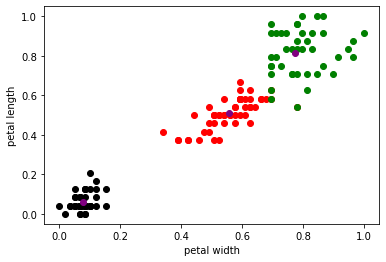

In [37]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='black')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='green')
plt.scatter(centers[:,0],centers[:,1],color='purple')
plt.xlabel("petal width")
plt.ylabel("petal length")

In [39]:
model.inertia_

1.701874688192097

In [45]:
sse=[]
k=[]
for i in range(1,21):
    model1=KMeans(n_clusters=i)
    model1.fit(data[['petal length (cm)','petal width (cm)']])
    sse.append(model1.inertia_)
    k.append(i)
    

In [44]:
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1588792731667128,
 0.8616150173815893,
 0.6800800986587507,
 0.5651273455703979,
 0.4931360038635195,
 0.4154845785171635,
 0.36488103906657304,
 0.3314714316552442,
 0.30106118785282227,
 0.2700747590448489,
 0.2604994185272066,
 0.23175015703159546,
 0.22125454484540702,
 0.20246252054182257,
 0.1862860916898148,
 0.17585833053722733,
 0.15767218577708356]

Text(0.5, 1.0, 'elbow method to find optimum value of k for my model')

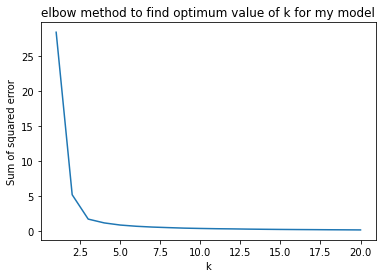

In [50]:
plt.plot(k,sse)
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.title('elbow method to find optimum value of k for my model')